In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import *
from numpy import log as ln

## Fixed Point Method

## Define a Function

In [3]:
def f(x):                                          #definisikan fungsi
    return ln(4+x-x**2)
def g(x):
    return 4+x-x**2

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


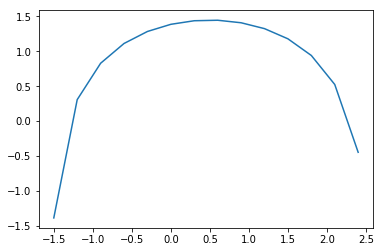

In [25]:
a=np.arange(-3,4,0.3)
plt.plot(a,f(a))

Ada Akar di interval 0 hingga 4.

## Mencari akar dengan cara biasa

In [34]:
from scipy.optimize import fsolve
akar_sesungguhnya=fsolve(f,1.3,xtol=0.0001)
akar_sesungguhnya,f(akar_sesungguhnya)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(array([1.3]), array([1.28370777]))

In [33]:
help(fsolve)

Help on function fsolve in module scipy.optimize.minpack:

fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
    Find the roots of a function.
    
    Return the roots of the (non-linear) equations defined by
    ``func(x) = 0`` given a starting estimate.
    
    Parameters
    ----------
    func : callable ``f(x, *args)``
        A function that takes at least one (possibly vector) argument,
        and returns a value of the same length.
    x0 : ndarray
        The starting estimate for the roots of ``func(x) = 0``.
    args : tuple, optional
        Any extra arguments to `func`.
    fprime : callable ``f(x, *args)``, optional
        A function to compute the Jacobian of `func` with derivatives
        across the rows. By default, the Jacobian will be estimated.
    full_output : bool, optional
        If True, return optional outputs.
    col_deriv : bool, optional
        Specify wheth

# Fixed Point

In [22]:
from numpy import sin,cos,log,exp                  #import fungsi transenden (tidak harus empat ini, sesuai kebutuhan)    #input fungsinya

def FixedPoint(p0,N,toleransi):                      #metode fixed point
    p = f(p0)                                
    abs_error = 0                    
    p0 = p    
    hasil=[p]
    for i in range(N):    
        if abs(f(p)-float(akar_sesungguhnya))<toleransi:
            break
        else:
            p = f(p0)                                                    
            p0 = p   
            hasil.append(p)
    return hasil


batas_iterasi=input('sampai berapa iterasi yang dinginkan jika barisan tak konvergen ? :')
batas_iterasi=int(batas_iterasi)
toleransi=input('toleransi yang dinginkan pada program ? :')
toleransi=float(toleransi)
p_awal=input('nilai awal ? :')
p_awal=float(p_awal)
fixed_point = FixedPoint(p_awal,N=batas_iterasi,toleransi=toleransi)

metode_fixed_point=pd.DataFrame(fixed_point,columns=['akar'])
metode_fixed_point

sampai berapa iterasi yang dinginkan jika barisan tak konvergen ? :100
toleransi yang dinginkan pada program ? :0.0000000001
nilai awal ? :2


,akar
0,0.693147
1,1.438102
2,1.214902
3,1.318795
4,1.275244
...,...
96,1.288678
97,1.288678
98,1.288678
99,1.288678


## Aitken Method

In [26]:
#bikin barisan {pn}
from numpy import sin,cos,log,exp
def p(n):
    return ln(4+n-n**2)

def aitken_sequence(n):
    barisan = [2]
    aitken= []
    p0=2
    for i in range(1,n+3):
        p1 = p(p0)                                                  
        p0 = p1      
        hasil=[]                    
        barisan.append(p(p1))
        if i>=3:
            
            pcap = barisan[i-3]-((barisan[i-2]-barisan[i-3])**2/(barisan[i-1]-2*barisan[i-2]+barisan[i-3]))
            aitken.append(pcap)
    return (barisan,aitken)


    
n = eval(input('Masukkan banyak suku barisan : '))
if n<2:
    print('Banyak suku yang dimasukkan terlalu sedikit.')
else:
    barisan_awal,aitken_=aitken_sequence(n)


Masukkan banyak suku barisan : 4


Buat tabelnya dibawah 

In [6]:
barisan=pd.DataFrame(data_barsan)
aitken=pd.DataFrame(data_aitken)

Tabel  sebelum dikenakan aitken

In [8]:
barisan

,barisan awal
0,2.000000
1,1.438102
2,1.214902
3,1.318795
4,1.275244
5,1.294452
6,1.286155


Tabel 

In [9]:
aitken

,barisan aiken
0,1.067814
1,1.285796
2,1.288108
3,1.288573


## Stefensen Method

In [28]:
def stefensen_sequence(n):
    
    stefensen = [2]
    p0=2
    for i in range(1,n+3):
        p1 = p(p0)                                                  
        p0 = p1      
        hasil=[]                    
        stefensen.append(p(p1))
        if i%3==0:
            pcap = stefensen[i-3]-((stefensen[i-2]-stefensen[i-3])**2/(stefensen[i-1]-2*stefensen[i-2]+stefensen[i-3]))
            stefensen.append(pcap)
    return (stefensen)

    
n = eval(input('Masukkan banyak suku barisan : '))
if n<2:
    print('Banyak suku yang dimasukkan terlalu sedikit.')
else:
    stefensen_=stefensen_sequence(n)
metode_stefensen=pd.DataFrame(stefensen_,columns=['akar stefensen'])

Masukkan banyak suku barisan : 4


In [29]:
metode_stefensen

,akar stefensen
0,2.000000
1,1.438102
2,1.214902
3,1.318795
4,1.067814
5,1.275244
6,1.294452
7,1.286155
8,1.181382
